**Importing our relevant libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as shc

**loading our dataset**

In [2]:
data = pd.read_csv('C:\\Users\\Pc\\Desktop\\GoMyCode\\CC_GENERAL.csv', sep=',',encoding='unicode_escape')
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


**data preprocessing**

In [3]:
#Describing our dataset
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [4]:
#Some more informations about our dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
#Let's see te correlation between features
cor=data.corr()
cor

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,0.385152,0.154338,0.531283,0.322802,0.398684,-0.318959,0.072692
BALANCE_FREQUENCY,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,0.141555,0.189626,0.095843,0.065008,0.132569,-0.095082,0.119776
PURCHASES,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,-0.067175,0.689561,0.356963,0.603264,0.093860,0.180379,0.086288
ONEOFF_PURCHASES,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,-0.046212,0.545523,0.319724,0.567292,0.048755,0.132763,0.064150
INSTALLMENTS_PURCHASES,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,-0.073999,0.628108,0.256499,0.384084,0.132172,0.182569,0.086143
CASH_ADVANCE,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,-0.215507,-0.086754,-0.177070,0.628522,0.656498,-0.075850,0.303985,0.453238,0.140107,-0.152935,-0.068312
PURCHASES_FREQUENCY,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,0.501343,0.862934,-0.308478,-0.203478,0.568430,0.119788,0.103464,0.003030,0.305802,0.061506
ONEOFF_PURCHASES_FREQUENCY,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,0.142329,-0.111716,-0.069088,0.544869,0.295038,0.243537,-0.030327,0.157531,0.082466
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,-0.262958,-0.169207,0.529975,0.060755,0.085551,0.030073,0.250087,0.073275
CASH_ADVANCE_FREQUENCY,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,1.000000,0.799561,-0.131168,0.132616,0.183192,0.098838,-0.249773,-0.133372


<AxesSubplot:>

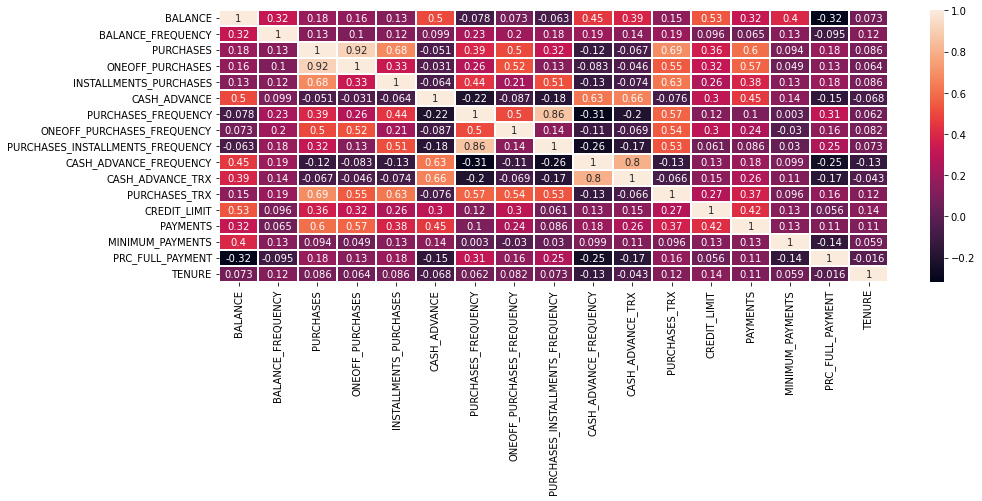

In [7]:
#Plotting the heatmap to understand the correlation between the different features
fig, ax = plt.subplots(figsize=(15, 5))
sns.heatmap(cor, annot=True, linewidths=.3)

**Data cleaning**

1. dropping unessacery columns

In [9]:
data=data.drop("CUST_ID", axis=1)

2. Dealing with missing values

In [10]:
data.isna()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8946,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
8947,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8948,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
#Replacing all NaN values with 0
data=data.fillna(0)
data.head(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


**Hierarchical clustering**

1. visualizing the structure of the data and understanding how clusters are related

In [12]:
##Importing our clustering algorithm : Agglomerative
#Applying agglomerative algorithm with 7 clusters, using euclidean distance as a metric
model=AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
#fitting our model
clust_labels=model.fit_predict(data)
#Kmeans labels
agglomerative=pd.DataFrame(clust_labels)
agglomerative

,0
0,4
1,0
2,0
3,0
4,4
...,...
8945,4
8946,4
8947,4
8948,4


we will use The hierarchical clustering approach to visualize the relationships between different groups. in our dataset in a dendrogram.
the linkage method has been used to calculate the distance between clusters. 
This can be one of “ward,” “complete,” “average,” or “single.” I use the ward method.
and To train the model, we specify the desired parameters and fit the model to the data using the fit_predict method. This method will fit the model to the data and generate predictions in one step.

2. Plot the clusters

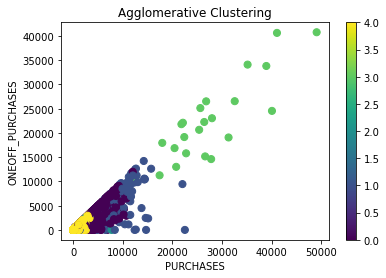

In [13]:
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (data ['PURCHASES'] , data ["ONEOFF_PURCHASES"] , c= agglomerative[0], s=50)
ax.set_title("Agglomerative Clustering")
ax.set_xlabel("PURCHASES")
ax.set_ylabel("ONEOFF_PURCHASES")
plt.colorbar(scatter)



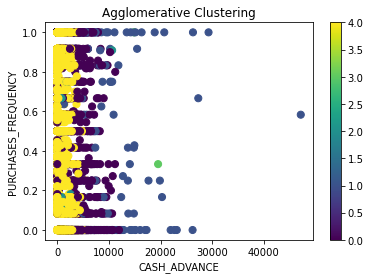

In [14]:
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (data ['CASH_ADVANCE'] , data ["PURCHASES_FREQUENCY"] , c= agglomerative[0], s=50)
ax.set_title("Agglomerative Clustering")
ax.set_xlabel("CASH_ADVANCE")
ax.set_ylabel("PURCHASES_FREQUENCY")
plt.colorbar(scatter)



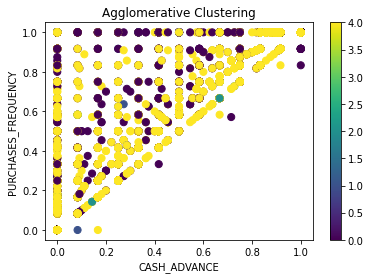

In [15]:
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (data ['PURCHASES_INSTALLMENTS_FREQUENCY'] , data ["PURCHASES_FREQUENCY"] , c= agglomerative[0], s=50)
ax.set_title("Agglomerative Clustering")
ax.set_xlabel("CASH_ADVANCE")
ax.set_ylabel("PURCHASES_FREQUENCY")
plt.colorbar(scatter)


Plot the dendogram

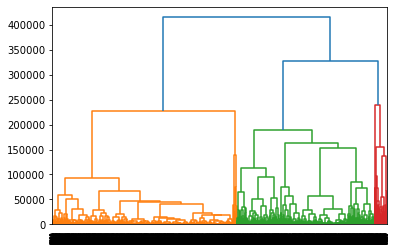

In [16]:
#Plotting our dendogram using the ward method
d=shc.dendrogram(shc.linkage(data, method='ward'))

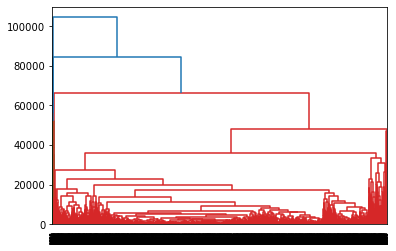

In [41]:
#plotting our dendogram using the comlete method
d=shc.dendrogram(shc.linkage(data, method='complete'))

linkage: The method used to calculate the distance between clusters. This can be one of “ward,” “complete,” “average,” or “single.”
To train the model, we specify the desired parameters and fit the model to the data using the fit_predict method. This method will fit the model to the data and generate predictions in one step.

Try different K values and select the best one. 

to determine the best K-value is the elbow method which is based on the idea that to have a good quality of a cluster:

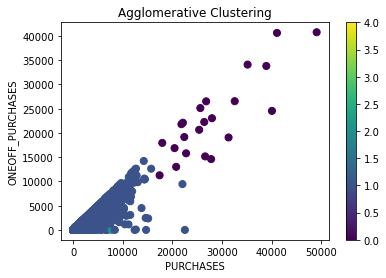

In [34]:
  #Importing our clustering algorithm: KMeans
kmeans=KMeans(n_clusters=5, random_state=0)  #Cluster our data by choosing 5 as number of clusters
kmeans.fit(data)
y_means = kmeans.fit_predict(data)


In [29]:
plt.scatter(data["PURCHASES"][data.label == 0],          
            data["ONEOFF_PURCHASES"][data.label == 0],s=80,c='magenta',label='Careful')
plt.scatter(data["PURCHASES"][data.label == 1],
           data["ONEOFF_PURCHASES"][data.label == 1],s=80,c='yellow',label='Standard')
plt.scatter(data["PURCHASES"][data.label == 2],
           data["ONEOFF_PURCHASES"][data.label == 2],s=80,c='green',label='Target')
plt.scatter(data["PURCHASES"][data.label == 3], 
           data["ONEOFF_PURCHASES"][data.label == 3],s=80,c='cyan',label='Careless')
plt.scatter(data["PURCHASES"][data.label == 4], 
           data["ONEOFF_PURCHASES"][data.label == 4],s=80,c='burlywood',label='Sensible')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('PURCHASES')
plt.ylabel('ONEOFF_PURCHASES')
plt.legend()
plt.show()


AttributeError: 'DataFrame' object has no attribute 'label'

BEST k VALUE

In [39]:
sum_of_squared_distance=[]
K= range(1,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data)
    sum_of_squared_distance.append(kmeanModel.inertia_)

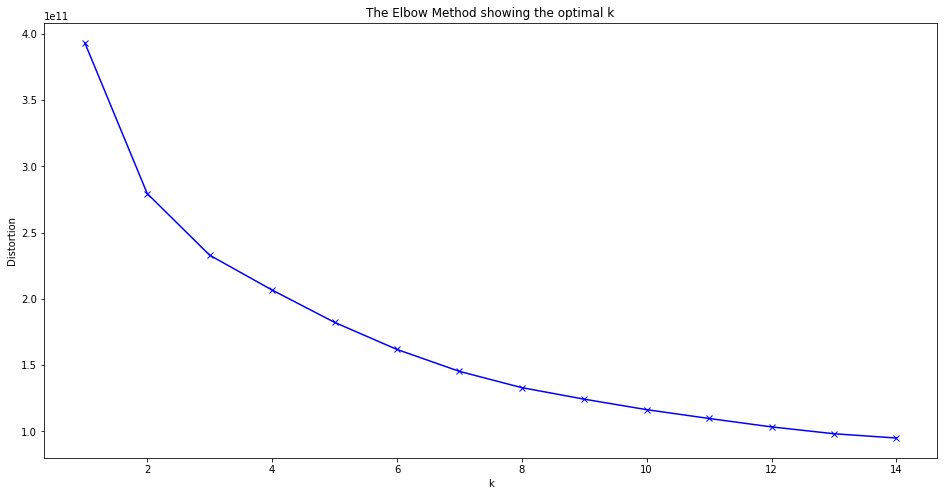

In [40]:
plt.figure(figsize=(16,8))
plt.plot(K, sum_of_squared_distance, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

To determine the optimal number of clusters, we have to select the value of k at the “elbow”: the point after which the inertia start decreasing in a linear fashion. Thus for the given data, we conclude that the optimal number of clusters for the data is 3.

In [41]:
kmeanModel = KMeans(n_clusters=3)
kmeanModel.fit(data)

KMeans(n_clusters=3)

In [43]:
data['k']=kmeanModel.predict(data)
data['PURCHASES_FREQUENCY']=data['PURCHASES_FREQUENCY']
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(data[0], data[1], c=data['PURCHASES_FREQUENCY'])
axes[1].scatter(data[0], data[1], c=data['k_means'], cmap=plt.cm.Set1)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('K_Means', fontsize=18)


ValueError: X has 18 features, but KMeans is expecting 17 features as input.

In [44]:
data['k_means']=kmeanModel.predict(data)
data['target']=data['target']
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(data[0], data[1], c=data['target'])
axes[1].scatter(data[0], data[1], c=data['k_means'], cmap=plt.cm.Set1)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('K_Means', fontsize=18)

ValueError: X has 18 features, but KMeans is expecting 17 features as input.

In [ ]:


kmeans = KMeans(n_clusters=2,random_state=0)

kmeans.fit(X)

labels = kmeans.labels_

# check how many of the samples were correctly labeled

correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

In [44]:
plt.scatter(data[y_means==0,0],data[y_means==0,1],s=50, c='purple',label='Cluster1')
plt.scatter(data[y_means==1,0],data[y_means==1,1],s=50, c='blue',label='Cluster2')
plt.scatter(data[y_means==2,0],data[y_means==2,1],s=50, c='green',label='Cluster3')
plt.scatter(data[y_means==3,0],data[y_means==3,1],s=50, c='cyan',label='Cluster4')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')
plt.title('Customer segments')
plt.xlabel('Annual income of customer')
plt.ylabel('Annual spend from customer on site')
plt.legend()
plt.show()

TypeError: '(array([False, False, False, ..., False, False, False]), 0)' is an invalid key

In [45]:
kmeans = KMeans(n_clusters = 3,                 # Set amount of clusters
                init = 'k-means++',             # Initialization method for kmeans
                max_iter = 300,                 # Maximum number of iterations
                n_init = 10,                    # Choose how often algorithm will run with different centroid
                random_state = 0)               # Choose random state for reproducibility

pred_y = kmeans.fit_predict(data)


# Plot the data
plt.scatter(data[:,0], 
            data[:,1])

# Plot the clusters 
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], 
            s=200,                             # Set centroid size
            c='red')                           # Set centroid color
plt.show()

TypeError: '(slice(None, None, None), 0)' is an invalid key